In [1]:
import sys
from functools import partial
from zipfile import ZipFile
import pandas as pd
sys.path.append('../src')
%matplotlib inline

# Your contact details

In [2]:
from gorenml import submit
my_submit = partial(submit, "Uri Goren", "Company", "uri@uatt.org.il", "050")

# Read data

In [3]:
data = []
with ZipFile("../data/data.zip") as z:
    for fname in z.namelist():
        if not fname.endswith('.txt') or not fname.startswith('data'):
            continue
        content = z.read(fname).decode('utf8')
        label, idx = fname[5:-4].split('-', 1)
        data.append((idx,label,content,))
df_train = pd.DataFrame(data, columns=("id", "label", "content"))
df_train.sample(10)

,id,label,content
2696,20800,rsu,EXHIBIT 10.1\n\nDORAL FINANCIAL CORPORATION \...
1557,10800,employment,\n\n\nExhibit 10.4\n\n \n\n\n\n\nThis Emplo...
1942,14650,employment,Exhibit 10.04\n\n\n\nThis EMPLOYMENT AGREEMENT...
2797,21810,rsu,"\n\n\n\n\nLI3 ENERGY, INC.\n\nTHIS AGREEMENT..."
2072,15950,employment,\n \n\n\n\n\n \n\n\nThis employment agreem...
3514,28980,rsu,##### \n\nExhibit 10.3\n\nINTEL CORPORATION\n\...
3243,26270,rsu,Exhibit 10.59\n\n2006 ITT EDUCATIONAL SERVICES...
1359,08820,employment,Exhibit 10.2\n\n\n\nThis EMPLOYMENT AGREEMENT ...
3791,31750,rsu,Exhibit 10.20 \n\nPREFORMED LINE PRODUCTS COMP...
1779,13020,employment,AMENDMENT TO\n\n\n\n(Restated as of December 3...


In [4]:
data = []
with ZipFile("../data/test_data.zip") as z:
    for fname in z.namelist():
        content = z.read(fname).decode('utf8')
        if not fname.endswith('.txt') or not fname.startswith('test'):
            continue
        idx = fname[5:-4]
        data.append((idx,content,))
df_test = pd.DataFrame(data, columns=("id", "content"))
df_test.sample(10)

,id,content
518,04366,Exhibit 10.2\n\n\n\nTHIS EMPLOYMENT AGREEMENT ...
485,22212,Ex. 10.7\n\n \n\n\n \n\n\n\n\nThis Award Agr...
580,29778,##### \n\nExhibit 10.28\n\nCELANESE CORPORATIO...
593,40254,Exhibit 3.1\n\n\n\nTO THE\n\nARTICLES OF INCOR...
677,11057,\n\n\nExhibit 10.1\n\nExecution Version\n\n ...
474,19496,"Exhibit 10.28\n\nCHICO’S FAS, INC. \n2002 OMN..."
319,26482,Exhibit 10.11.5 \n\nPAETEC HOLDING CORP. \n\n2...
260,28131,ATTENTION: \n \nTHIS RESTRICTED STOCK AWARD ...
550,01357,Exhibit 2.5\n\n\n\nSTOCK PURCHASE AGREEMENT\n\...
573,20953,Exhibit 10.31 \n\n\n\nPURSUANT TO THE SEACOR H...


# Plot distribution of labels

<AxesSubplot:>

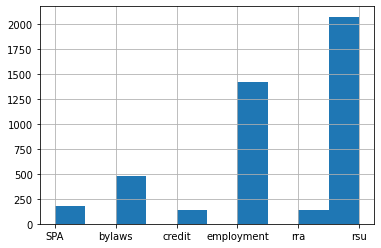

In [5]:
df_train["label"].hist()

# Submit
## Simple submission

In [6]:
# for all documents
df_test["label"] = "rsu"
submission = dict(df_test[["id","label"]].values)
#submission name must be unique
submission_name = "uri_most_likely"
my_submit(submission_name, submission)


<urlopen error [Errno -3] Temporary failure in name resolution>


## Submission by string search


In [7]:
df_test["label"] = "rsu"
df_test.loc[df_test["content"].str.contains("EMPLOYMENT"),"label"] = 'employment'
df_test.loc[df_test["content"].str.contains("CREDIT"),"label"] = 'credit'
df_test.loc[df_test["content"].str.contains("BYLAWS"),"label"] = 'bylaws'
submission = dict(df_test[["id","label"]].values)

submission_name = "uri_string_search"
my_submit(submission_name, submission)

could not convert string to float: '<html><head><meta http-equiv="refresh" content="30" /></head><!DOCTYPE html>\n<html lang="en">\n<head>\n  <title>NLP Classification Workshop</title>\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css">\n  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>\n  <script src="https://cdnjs.cloudflare.com/ajax/libs/popper.js/1.14.6/umd/popper.min.js"></script>\n  <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.2.1/js/bootstrap.min.js"></script>\n  <meta http-equiv="refresh" content="30" />\n</head>\n<body><div class="container" align="center">\n<h1>Leader board</h1>\n  <table class="table table-striped">\n    <thead>\n      <tr>\n        <th>Submission_id</th>\n        <th>Accuracy</th>\n      </tr>\n    </thead>\n    <tbody>\n<tr><th>4</th><td>0</td></tr><tr><th>

# See how you rank
Leaderboard is available at:
http://www.goren.ml/leaderboard/